# <center>AI FUNDAMENTALS BOOTCAMP - MODULE II</center>
## <center>ML TEMPLATE</center>


### Project Description
A description of the project that you would like to give

### Project Objective
In your own words

### Data Source Description
Decribe the datasource(s) used in this template


## **<center>Scoring Guidelines - Module II</center>**

### **Phase 1. Data Summary: 10% - 1 point** <br>
- In this phase, you must import all the necessary libraries for working with data (e.g., pandas, numpy, nltk, etc.) and load the Titanic dataset into a pandas DataFrame. Ensure the data loads correctly and perform an initial visualization (e.g., display the first rows using head() or verify the dimensions).<br>

### **Phase 2. EDA (Univariate and Multivariate Analysis) and Understanding Columns Data Processing: 30% - 3 points** <br>
- Explore the dataset to understand its structure and content. Analyze the distributions of the dataset variables. This phase helps you understand the data and prepare a strategy to process and use it in predictive analysis. <br>

### **Phase 3. Data Preprocessing: 40% - 4 points** <br>
- Clean and transform the selected text columns. This step transforms the text data into useful information that machine learning algorithms can process. <br>

### **Phase 4. Conclusion: 10% - 1 points**<br>
- Summary of the understanding of the application of various preprocessing, vectorization, and model performance on the dataset. This conclusion should contain key points from the data scientist's perspective to the user/client who needs to make a decision based on the analysis being performed. <br>

### **Phase 5. Notebook Presentation: 10% - 10 points** <br>
- Notebook structure and flow
- Well-commented code

### Each phase should contain its respective observations, as these will be part of the evaluation.

# **Phase 1. Data Summary: 10% - 1 point**

## Import the libraries needed to develop the Notebook

In [1]:
# Tratamiento de datos
#######################################
import numpy as np
import pandas as pd

# Graficos
#######################################
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Configuracion matplotlib
#######################################
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# to display values upto 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Instruction from https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set_theme(style="darkgrid")

## Data loading and descriptive analysis.

In [2]:
titanic_df = pd.read_csv("../data/2.Titanic-Dataset.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dataset summary

In [7]:
# Description of numeric columns
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


In [8]:
# Descriptive analysis of all columns in the dataset
titanic_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.00,NaN,NaN,NaN,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,NaN,NaN,NaN,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,NaN,NaN,NaN,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.00,NaN,NaN,NaN,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,NaN,NaN,NaN,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,NaN,NaN,NaN,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.00,NaN,NaN,NaN,32.20,49.69,0.00,7.91,14.45,31.00,512.33


## Searching for unique values for all variables

In [9]:
titanic_df.agg(['nunique']).T

,nunique
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


## Checking how many NaN or null values are present in each variable.

In [10]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_df.Cabin.value_counts()

Cabin
G6                 4
C23 C25 C27        4
B96 B98            4
F2                 3
D                  3
E101               3
C22 C26            3
F33                3
C83                2
C123               2
B28                2
D26                2
B58 B60            2
E33                2
D33                2
C52                2
F G73              2
B77                2
C93                2
B5                 2
D17                2
E24                2
E8                 2
E121               2
B35                2
E44                2
C92                2
C78                2
B20                2
C125               2
E67                2
D35                2
F4                 2
C2                 2
D36                2
C65                2
C124               2
B18                2
B57 B59 B63 B66    2
B49                2
B22                2
E25                2
D20                2
C68                2
B51 B53 B55        2
C126               2
E46                1
C85    

In [12]:
titanic_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
# parsing all columns of all data types
columnas = [col for col in titanic_df.columns]

In [14]:
for col in columnas:
    print("\n", titanic_df[col].value_counts(),"\n")


 PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64 


 Survived
0    549
1    342
Name: count, dtype: int64 


 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 


 Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 


 Sex
male      577
female    314
Name: count, dty

In [15]:
# parsing columns of data type 'object'
columnas_object = [col for col in titanic_df.columns if titanic_df[col].dtype == 'object']

In [16]:
for col in columnas_object:
    print("\n", titanic_df[col].value_counts(),"\n")


 Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 


 Sex
male      577
female    314
Name: count, dtype: int64 


 Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count,

## Determining if there are duplicate records

In [17]:
titanic_df.duplicated().sum()

np.int64(0)

## Determining the standard deviation of columns in the dataset

In [18]:
# parsing columns of data type 'object'
columnas_numericos = [col for col in titanic_df.columns if titanic_df[col].dtype != 'object']

In [19]:
for col in columnas_numericos:
    print("\n",col,": ",titanic_df[col].skew().sum(),"\n")


 PassengerId :  0.0 


 Survived :  0.4785234382949897 


 Pclass :  -0.6305479068752845 


 Age :  0.38910778230082704 


 SibSp :  3.6953517271630565 


 Parch :  2.7491170471010933 


 Fare :  4.787316519674893 



## Information counting if you do not want to do it completely for all columns

In [20]:
titanic_df.Sex.value_counts(normalize=True)

Sex
male     0.65
female   0.35
Name: proportion, dtype: float64

In [21]:
col_sex_conteo = titanic_df.Sex.value_counts(normalize=True)

In [22]:
col_sex_conteo *= 100

C:\Users\NICOSCORMI\AppData\Local\Temp\ipykernel_1484\1906183660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_sex_conteo.index,y=col_sex_conteo.values,palette='viridis')


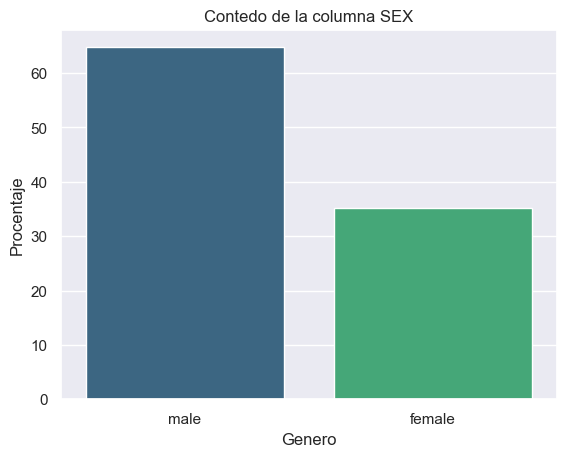

In [23]:
plt.Figure(figsize=(12,8))
sns.barplot(x=col_sex_conteo.index,y=col_sex_conteo.values,palette='viridis')
plt.title('Contedo de la columna SEX')
plt.xlabel('Genero')
plt.ylabel('Procentaje')
plt.show()

In [24]:
titanic_df.Survived.value_counts(normalize=True)

Survived
0   0.62
1   0.38
Name: proportion, dtype: float64

In [25]:
col_sobreviviente_conteo_sin_normalizar = titanic_df.Survived.value_counts()
col_sobreviviente_conteo_normalizado = titanic_df.Survived.value_counts(normalize=True)

In [26]:
col_sobreviviente_conteo_normalizado *= 100

C:\Users\NICOSCORMI\AppData\Local\Temp\ipykernel_1484\1791658803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_sobreviviente_conteo_sin_normalizar.index,y=col_sobreviviente_conteo_sin_normalizar.values,palette='viridis')


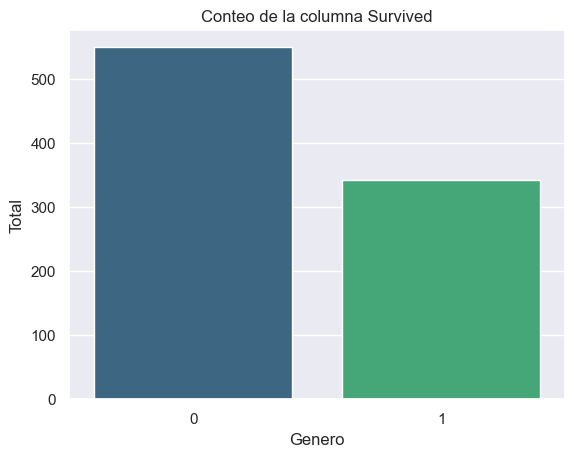

In [27]:
plt.Figure(figsize=(12,8))
sns.barplot(x=col_sobreviviente_conteo_sin_normalizar.index,y=col_sobreviviente_conteo_sin_normalizar.values,palette='viridis')
plt.title('Conteo de la columna Survived')
plt.xlabel('Genero')
plt.ylabel('Total')
plt.show()

C:\Users\NICOSCORMI\AppData\Local\Temp\ipykernel_1484\63355784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_sobreviviente_conteo_normalizado.index,y=col_sobreviviente_conteo_normalizado.values,palette='viridis')


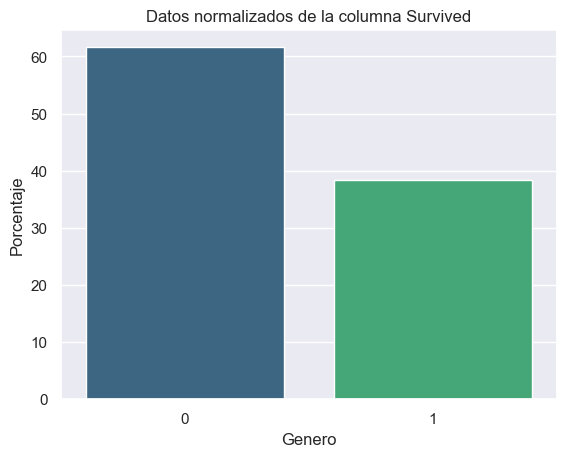

In [28]:
plt.Figure(figsize=(12,8))
sns.barplot(x=col_sobreviviente_conteo_normalizado.index,y=col_sobreviviente_conteo_normalizado.values,palette='viridis')
plt.title('Datos normalizados de la columna Survived')
plt.xlabel('Genero')
plt.ylabel('Porcentaje')
plt.show()

# **Phase 2. EDA (Univariate and Multivariate Analysis) and Understanding Columns Data Processing: 30% - 3 points**

*Calculating the interquartile range (Q3 (75%) - Q1 (25%))*

IQR = Q3 - Q1

The line called the median allows me to have equal shares of the data in the dataset.

Calculating the lower and upper limits of the boxplot graph
- Lower limit = Q1 - 1.5 x IQR
- Upper limit = Q3 + 1.5 x IQR

In [29]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Analyzing the Fare Column

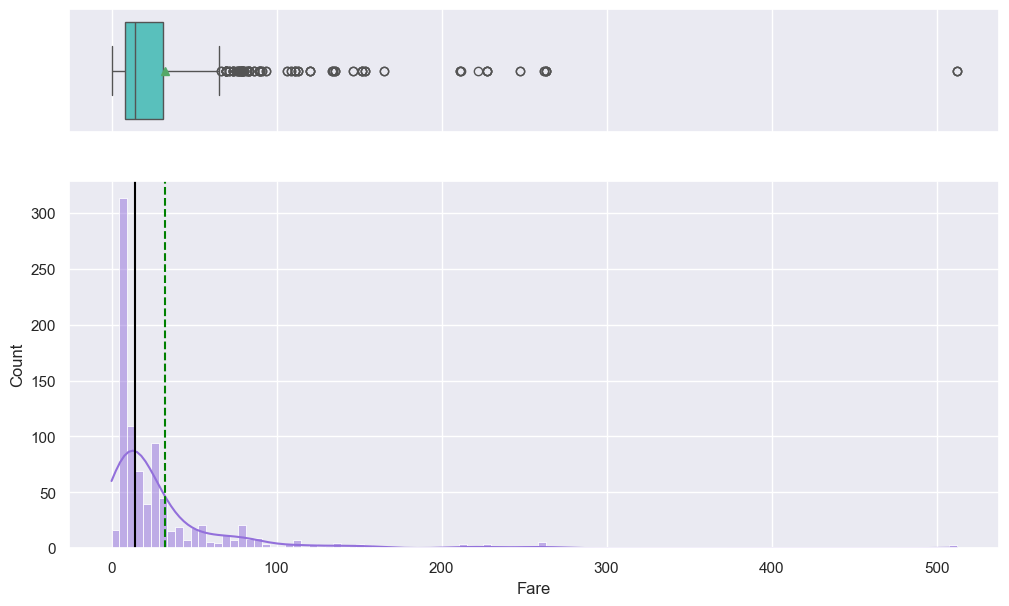

In [30]:
histogram_boxplot(titanic_df,"Fare", kde=True)

## Analyzing the Age Column

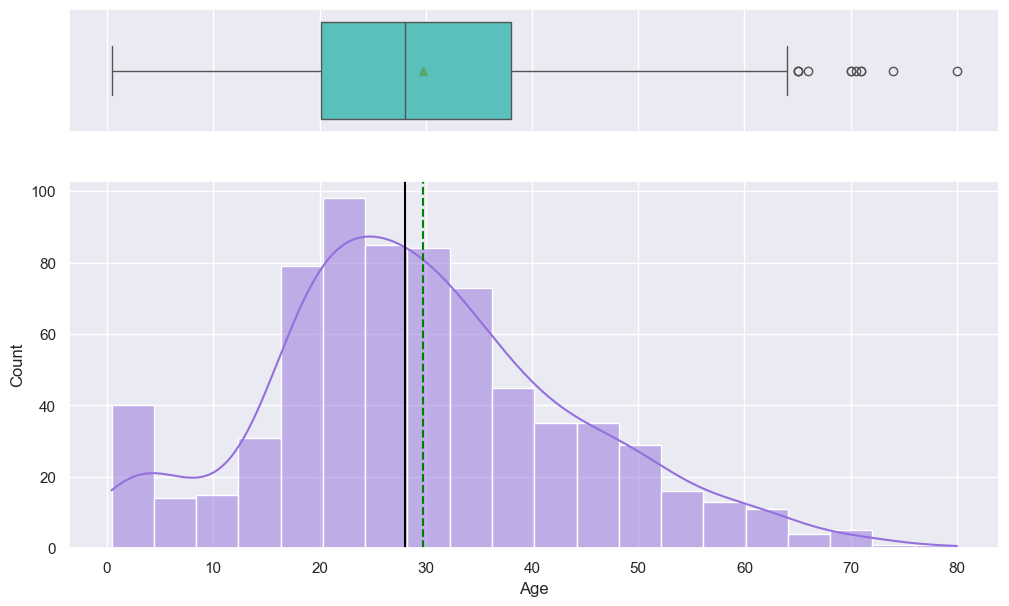

In [31]:
histogram_boxplot(titanic_df,"Age", kde=True)

## Definition of the function that allows me to generate bar charts with labels

In [32]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

C:\Users\NICOSCORMI\AppData\Local\Temp\ipykernel_1484\1758563097.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


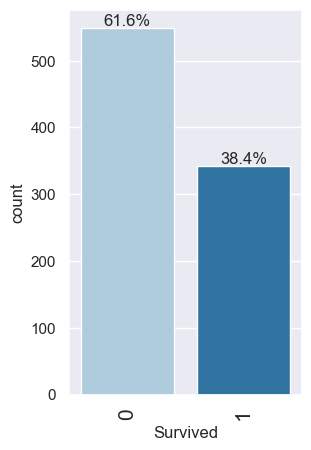

In [33]:
labeled_barplot(titanic_df,"Survived", perc=True)

C:\Users\NICOSCORMI\AppData\Local\Temp\ipykernel_1484\1758563097.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


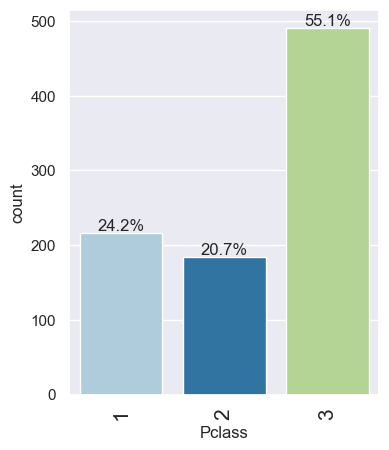

In [34]:
labeled_barplot(titanic_df,"Pclass", perc=True)

C:\Users\NICOSCORMI\AppData\Local\Temp\ipykernel_1484\1758563097.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


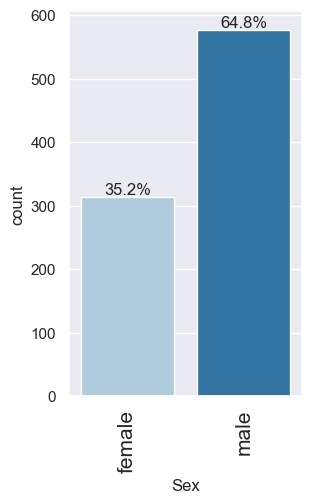

In [35]:
labeled_barplot(titanic_df,"Sex", perc=True)

# **Phase 3. Data Preprocessing: 40% - 4 points**

In [36]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [37]:
# Descripcion de columnas numericas
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,891.00,29.36,13.02,0.42,22.00,28.00,35.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


In [38]:
# Analisis desciptivo de todas las columnas del dataset
titanic_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.00,NaN,NaN,NaN,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,NaN,NaN,NaN,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,NaN,NaN,NaN,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.00,NaN,NaN,NaN,29.36,13.02,0.42,22.00,28.00,35.00,80.00
SibSp,891.00,NaN,NaN,NaN,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,NaN,NaN,NaN,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.00,NaN,NaN,NaN,32.20,49.69,0.00,7.91,14.45,31.00,512.33


In [39]:
# Analisis desciptivo de todas las columnas del dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [40]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.25,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.28,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.92,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.10,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.00,0,0,373450,8.05,NaN,True,False,True
